In [1]:
import pickle as pkl
import pyarrow.parquet as pq
import numpy as np
import json
import os
import glob
import argparse

import hist as hist2

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
plt.style.use(hep.style.CMS)
plt.rcParams.update({'font.size': 20})

# luminosity
f = open("../fileset/luminosity.json")
luminosity = json.load(f)['2017']
luminosity = luminosity / 1000.
f.close()

In [5]:
! ls /Users/fmokhtar/Desktop/ele_event_weight.pkl

/Users/fmokhtar/Desktop/ele_event_weight.pkl


In [80]:
# load the hists
ch = 'ele'
# ch = 'mu'
with open(f"/Users/fmokhtar/Desktop/{ch}_all_in_all.pkl", "rb") as f:
    all_in_all = pkl.load(f)
    f.close()

In [89]:
for x in all_in_all:
    if x not in [72.69830322265625, -72.69830322265625,303.3580017089844,-303.3580017089844,316.46600341796875]:
        print(x)
               

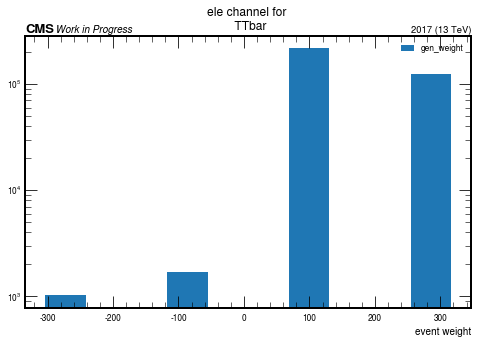

In [92]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(all_in_all, label='gen_weight')
ax.set_xlabel(f"event weight")
ax.set_yscale('log')
ax.set_title(f'{ch} channel for \n {sample}')
hep.cms.lumitext(f"{year} (13 TeV)", ax=ax)
hep.cms.text("Work in Progress", ax=ax)
ax.legend()

In [67]:
# load the hists
ch = 'ele'
# ch = 'mu'
with open(f"/Users/fmokhtar/Desktop/ele_event_weight.pkl", "rb") as f:
    h = pkl.load(f)
    f.close()

In [68]:
h

Hist(
  StrCategory(['TTbar'], growth=True, name='samples', label='samples'),
  Regular(100, 0, 1, name='ch_weight', label='channel weight'),
  Regular(100, 0, 1, name='plain_weight', label='plain weight'),
  storage=Double()) # Sum: 0.0 (342591.0 with flow)

/opt/anaconda3/envs/pyg-coffea/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


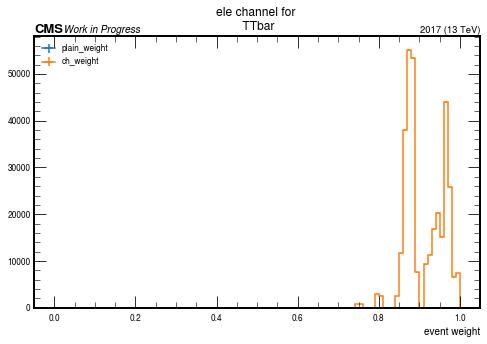

In [69]:
        # make plots per channel
        for sample in h.axes[0]:
            fig, ax = plt.subplots(figsize=(8, 5))
            hep.histplot(h[{'samples': sample, 'ch_weight': sum}], ax=ax, label='plain_weight')
            hep.histplot(h[{'samples': sample, 'plain_weight': sum}], ax=ax, label='ch_weight')
            ax.set_xlabel(f"event weight")
            ax.set_title(f'{ch} channel for \n {sample}')
            hep.cms.lumitext(f"{year} (13 TeV)", ax=ax)
            hep.cms.text("Work in Progress", ax=ax)
            ax.legend()